In [32]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("SPOTIFY_CLIENT")
client_secret = os.environ.get("SPOTIFY_SECRET")

In [33]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

**En este caso utilizando una llamada a la API de spotify, analizaremos al cantante Badbunny para ver si la popularidad tiene algún tipo de relación con la duración de la canción. Se tomarán las canciones mas populares del cantante.**

In [ ]:
results = sp.search(q='bad bunny', limit=20) #Buscamos su nombre con la API y tomamos todos los resultados
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=20&query=bad%20bunny&type=track',
  'limit': 20,
  'next': 'https://api.spotify.com/v1/search?offset=20&limit=20&query=bad%20bunny&type=track',
  'offset': 0,
  'previous': None,
  'total': 905,
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4q3ewBCX7sLwd24euuV69X'},
       'href': 'https://api.spotify.com/v1/artists/4q3ewBCX7sLwd24euuV69X',
       'id': '4q3ewBCX7sLwd24euuV69X',
       'name': 'Bad Bunny',
       'type': 'artist',
       'uri': 'spotify:artist:4q3ewBCX7sLwd24euuV69X'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
 

In [ ]:
for idx,track in enumerate(results['tracks']['items']): #Navegamos en el diccionario e imprimimos algunos resultados
    print(f'{idx+1}: {track['name']}')
    print(f'Duration: {track['duration_ms']/60000:.2f} min')# ms to min
    print(f'Rating: {track['popularity']}')
    print(f'Song: {track['external_urls']['spotify']}')
    print()

1: Tití Me Preguntó
Duration: 4.06 min
Rating: 82
Song: https://open.spotify.com/track/1IHWl5LamUGEuP4ozKQSXZ

2: DtMF
Duration: 3.95 min
Rating: 91
Song: https://open.spotify.com/track/3sK8wGT43QFpWrvNQsrQya

3: NUEVAYoL
Duration: 3.06 min
Rating: 89
Song: https://open.spotify.com/track/5TFD2bmFKGhoCRbX61nXY5

4: BAILE INoLVIDABLE
Duration: 6.13 min
Rating: 90
Song: https://open.spotify.com/track/2lTm559tuIvatlT1u0JYG2

5: EoO
Duration: 3.41 min
Rating: 88
Song: https://open.spotify.com/track/6J5kc12BW5HuP3d7C3vvx8

6: Callaita
Duration: 4.18 min
Rating: 77
Song: https://open.spotify.com/track/71wFwRo8xGc4lrcyKwsvba

7: LA CANCIÓN
Duration: 4.04 min
Rating: 86
Song: https://open.spotify.com/track/0fea68AdmYNygeTGI4RC18

8: MONACO
Duration: 4.45 min
Rating: 79
Song: https://open.spotify.com/track/4MjDJD8cW7iVeWInc2Bdyj

9: Me Porto Bonito
Duration: 2.98 min
Rating: 81
Song: https://open.spotify.com/track/6Sq7ltF9Qa7SNFBsV5Cogx

10: DÁKITI
Duration: 3.42 min
Rating: 78
Song: https://ope

**Creamos un iterador para tomar los key:values del diccionario que estamos recorriendo y los guardamos en una lista que contendra un diccionario con los datos que necesitamos**

In [36]:
songs = []
for track in results['tracks']['items']:
    songs.append({
        'singer': track['name'],
        'popularity': track['popularity'],
        'duration': track['duration_ms']/60000
    })

tracks_df = pd.DataFrame(songs)
tracks_df

,singer,popularity,duration
0,Tití Me Preguntó,82,4.061933
1,DtMF,91,3.951950
2,NUEVAYoL,89,3.061417
3,BAILE INoLVIDABLE,90,6.128750
4,EoO,88,3.412800
5,Callaita,77,4.175550
6,LA CANCIÓN,86,4.042883
7,MONACO,79,4.453233
8,Me Porto Bonito,81,2.976117
9,DÁKITI,78,3.418167


In [42]:
tracks_df.sort_values(by='popularity',ascending=False)

,singer,popularity,duration
1,DtMF,91,3.951950
3,BAILE INoLVIDABLE,90,6.128750
2,NUEVAYoL,89,3.061417
4,EoO,88,3.412800
16,VeLDÁ,87,3.922267
11,VOY A LLeVARTE PA PR,87,2.606067
6,LA CANCIÓN,86,4.042883
14,KLOuFRENS,85,3.318567
18,Qué Pasaría...,85,3.183633
0,Tití Me Preguntó,82,4.061933


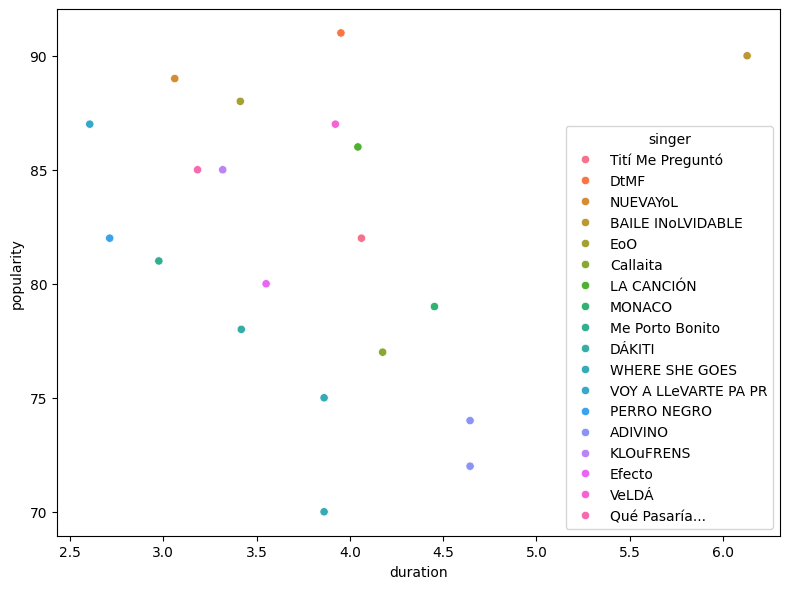

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(tracks_df, x=tracks_df['duration'], y=tracks_df['popularity'], hue=tracks_df['singer'])
plt.tight_layout()
plt.show()

In [38]:
tracks_df.select_dtypes('number').corr()

,popularity,duration
popularity,1.000000,-0.132146
duration,-0.132146,1.000000


**Como puede notarse tanto en el gráfico como en la tabla de correlación, no existe una correlación lineal entre la popularidad con respecto a la duración de la canción**